In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import math
import re
import operator


#for Hypothesis testing
from scipy.stats import binom, poisson, geom, norm, expon  # distribution  
from scipy.stats import shapiro, normaltest, levene, kruskal  # nArmality test
import statsmodels.api as sm                                  # qqplot
from scipy.stats import pearsonr, spearmanr, chi2_contingency   # correlAtion test
from statsmodels.tsa.stattools import adfuller, kpss # stAstanary test
from statsmodels.stats.weightstats import ztest  #num hypothesis testing
from scipy.stats import ttest_ind, ttest_rel, f_oneway, chi2   # parametric hypothisis testing


# for NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gk149\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gk149\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv("fake_job_postings_dataset.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


1. <b>Here we will be giving job description so that we can find which job is accurate and which are all fake jobs so that the user can easily identify and can apply to the actual jobs and truthful jobs that are being posted  we use basic EDA For this job description project</b>

1. May be here some of the columns are object d type and some of the columns are in 64 type so which means we have only 2 categories so that are object that is string and integer respectively

1. job ID is similar to serial number so we don't have any big kind of impact on this

1. title is something very intrusive and location also maybe department and salary range in most cases we see that salary range this not a number and then we have company profile description and requirement and benefits which are of a big strings mostly they need a very large regular expression kind of thing to detailed analysis 

1. company profile with is literally telling about the companies background and description is telling about the job description so which you will be working on and the requirement is which are all the basic things that you need to get a job so baby this 3 columns are very more important

1. And then we come back with benefits telecommunication company logo so basically company logo doesn't play any important role here has questions even though doesn't comes enough very good manner 

1. employee type may be so we have here a categorical kind of data and then required experience it is also some kind of categorical data required education is housework categorical data industry and function that comes under a kind of string kind of thing so we have variety of unique values here in resultant fault tolerant

1. so here we are about to find which kind of description matches or that is in queue commonly there in all the fault tolerance true that is 1 so if fraudulent is zero which means job descriptions is true and if it is one it is false so that that specific job description is said to be false so in this case we need to find out the relationship between all the false job descriptions may be and then which are all the factors that are influencing which adding an advantage to become an fraudulent job

1. <b>So for supporting this will be running some kind of hypothesis testing maybe correlation or independent test for dependency test between fraudulent and with mainly on employment type required experience required education industry function salary range title department and location so which are all like very much dependent on like with both each other so we will call we can create and come to a conclusion</b>

1. <b>and from company profile description and requirement so these are basically string kind of things so we need enough TK so the higher end to analyse this with a relation of fraudulent but that is being more higher now so will do basic regular expression d on which are all the common terms that are mainly found in fraudulent cases</b>

In [3]:
df0 = data.copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

- So we have some null values here may be we need to take care of all the columns we have about 18 columns in which 7 columns that have all the values present in it and remaining 10 columns as many missing values so that has to be taking care very carefully!

In [4]:
df0.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


- Here for fraudulent jobs been need to find some similarities with them so that such things that doesn't exist r exist very less in normal job descriptions so here first we will be separating as a first priority that is fraudulent message and non fraudulent messages and then we will compare it's location department salary range and some of its key components

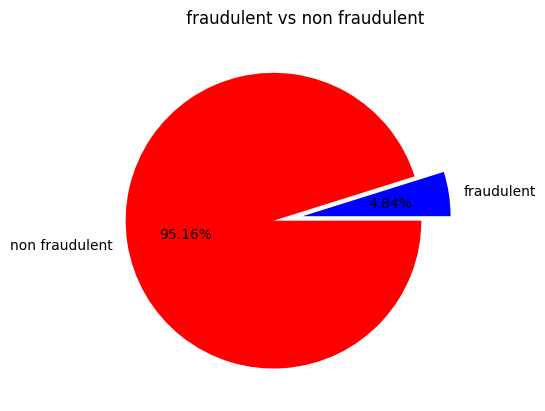

In [5]:
df_f = df0[df0['fraudulent'] == 1]  #fraudulent
df_nf = df0[df0['fraudulent'] == 0]  # non fraudulent

plt.title(' fraudulent vs non fraudulent')
plt.pie([df_f.shape[0], df_nf.shape[0]], 
        labels=['fraudulent', 'non fraudulent'], 
        explode=(0, 0.2),
        autopct='%1.2f%%',
       colors=['blue','red'])
plt.show()

##

## <U>1. Null values Fixing</u>

In [6]:
df0.isnull().sum().sort_values(ascending= False)

salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [7]:
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
department             64
required_education     45
benefits               40
required_experience    39
function               36
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

1. We will start with fixing the null values here so here we have location value basically location v caught to wait in a better way so better to drop all the 300 rows and for department I could see that like some of the job titles does not have any specific departments so for the all the remaining null values we will give a department called unknown

1. and for salary range and there are about only 3000 rows that are there but most of the salary rows are empty so which means salaries are not specified so maybe we can give that not specified which is level zero of salary range I could see the salary ranges of object type maybe this can be in a categorical data so which means law salary range or unknown salary range that we are about to fix it will be zero and then the above and low salary is of 1 and the mid salary 2 and then high salary 3 something like that

1. it is better to draw those those which does not have any company profile description and requirements benefits because we can't add company descriptions specify it so better to drop it in this case

1. In employee sahib there are only I think full time part time other so it is better to have this nan values to be other And record experience also to be not applicable

1. In some cases I could see that required education s null but basically for every job description at least we need a bachelor's degree that is a basic thing so we will fill all this null values with bachelor's degree the very basic

1. Industries and functions it is also something very irrespective TO particular industries so we can't fill this out so will remove this course which are all having it


- <b>Basically I have a doubt here which is if some columns are empty the key requirement columns are empty then which we can also save card these job descriptions can be fraudulent so that what we will do is the data which we have separated F, NF we apply drop na to both of these data so that we can see how many datas are been dropped in how many percentage let's say if it is a fraudulent data set and has a size of about 800 in which 500 roads are Mt so that which we can say that with the probability of 60% if the rows are empty then it is friedland</b>


In [8]:
print('before drop', df_f.shape)
df0_f = df_f.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_f.shape)

before drop (866, 18)
after drop (197, 18)


- <b>I dropped the non important columns so that these columns are mandatory for a job description basically so if we dont have these columns so we are assuming that start job description will be false so out of 866 we have only 197 rows reminding which means 22% or non fraudulent which means this concert works with an efficiency of 77.25 percentage if we dont have values in these particular columns we can say that pictures of redolent job description with the percentage of 77.25</b>


In [9]:
print('before drop', df_nf.shape)
df0_nf = df_nf.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_nf.shape)

before drop (17014, 18)
after drop (5971, 18)


- <b>And for non fraudulent even the same condition applies so in here we can see that if we dont have when use in these columns it is said to be non-fraudulent jobs with the efficiency of 64.9 percentage</b><br><br>
- <b>if its a fraudulent given that we have atleast one null value that is 77.25 percentag <br> if its a Non fraudulent given that we have atleast one null value that is 64.9 percentage</b>

- <b>In this case we have many null values basically some rules have vast number of null values so there are only 2 outputs will be considering here either will be filling all the null values so that which can also lead in false prediction and even if we drop all those null values it shrinks all the data set from 17,000 to 3000 maybe so which is very hard to predict which are which cannot be more accurate and result so we need a particular column to be taken care more specifically whether in that values can be dropped or can be filled.</b>

- For this let us consider which are all the columns are high priority requirement columns and which columns that does not impact on results so we will split the data with only columns which are mostly required

- Important columns are title, department, company profile, description, requirement, employment type, required experience, industry and function so from this if we take out the data and then we will drop columns which are null then we will remind with the least number of rows in this column so department has 6333 rows so maybe we will remind end up with a data set having 6300 rose which is literally 40% of data restart the case then we will even drop the department column so that we can have maybe 10,000 rows

#### A. <u>Fixing null values for department</u>

In [10]:
df01 = df0[['department', 'function']]
df01['department'].isnull().sum()   #number of null before fixing

11547

- I have found that like for column filling the column department we can use the column called function so in this function we have literally just 36% of datas are missing but when you compare with department 64% of the datas are missing so we can fill if this logic works like when comparing with department and function which are all existing like both function and department or existing when we compare with them values if it's matching case are very high then we can fill with if department is nan and function we have as something called administrative our department we can fill it with the appropriate function value so we can fill up to 32% of the data

In [11]:
df02 = df01.drop_duplicates(keep='first')
df03 = df02.dropna()
df04 = np.intersect1d(df03['department'], df03['function'])
df04

array(['Administrative', 'Advertising', 'Business Development',
       'Consulting', 'Customer Service', 'Design', 'Education',
       'Engineering', 'Finance', 'Human Resources',
       'Information Technology', 'Legal', 'Management', 'Manufacturing',
       'Marketing', 'Other', 'Product Management', 'Production',
       'Project Management', 'Public Relations', 'Purchasing',
       'Quality Assurance', 'Research', 'Sales', 'Supply Chain',
       'Training'], dtype=object)

In [12]:
df01 = df01.fillna(value= '-')
for i in range(0, len(df01['department'])):
    if (df01['department'][i] == '-') and ((df01['function'][i] in df04) or (df01['function'][i]) ):
        df01['department'][i] = df01['function'][i]

for i in range(0, len(df01['department'])):
    if (df01['department'][i] == '-'):
        df01['department'][i] = None

df01['department'].isnull().sum()   ##null values after fixing

4903

- From this weekend come to know that before updating the null values for column department we have about 11,547 values that are null but after fixing it according to this procedure so we have about like 4903 null values now so we have fixed the vote 6500 values in the department column


In [13]:
df0['department'] = df01['department']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
required_education     45
benefits               40
required_experience    39
function               36
department             27
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- <b>So from this we have decreased the null values of department column from <u>64% to 27%</u></b>

#### B. <u>Fixing Null values for function</u>

In [14]:
df01 = df0[['department', 'function']]
df01['function'].isnull().sum()   #number of null before fixing

6455

In [15]:
df02 = df01.drop_duplicates(keep='first')
df03 = df02.dropna()
df04 = np.intersect1d(df03['department'], df03['function'])
df04

array(['Accounting/Auditing', 'Administrative', 'Advertising',
       'Art/Creative', 'Business Analyst', 'Business Development',
       'Consulting', 'Customer Service', 'Data Analyst', 'Design',
       'Distribution', 'Education', 'Engineering', 'Finance',
       'Financial Analyst', 'General Business', 'Health Care Provider',
       'Human Resources', 'Information Technology', 'Legal', 'Management',
       'Manufacturing', 'Marketing', 'Other', 'Product Management',
       'Production', 'Project Management', 'Public Relations',
       'Purchasing', 'Quality Assurance', 'Research', 'Sales', 'Science',
       'Strategy/Planning', 'Supply Chain', 'Training', 'Writing/Editing'],
      dtype=object)

In [16]:
#the back tracking case for functions are taken lly from department.
df01 = df01.fillna(value= '-')
for i in range(0, len(df01['function'])):
    if (df01['function'][i] == '-') and ((df01['department'][i] in df04) or (df01['department'][i]) ):
        df01['function'][i] = df01['department'][i]

for i in range(0, len(df01['function'])):
    if (df01['function'][i] == '-'):
        df01['function'][i] = None

df01['function'].isnull().sum()

4903

In [17]:
df0['function'] = df01['function']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
required_education     45
benefits               40
required_experience    39
department             27
function               27
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- <b>By applying a similar procedure which is carried by department column null value from function column has been reduced to flow <u>36% to 27%</u></b>

- We also decided that if both the columns department and function has a null value in it so will find out like how many percentage of data are leading to fraudulent and non fraudulent

In [18]:
df05 = df0[(df0['department'].isnull() == True) & (df0['function'].isnull() == True)]
count_fraud = len(df05[df05['fraudulent'] == 1])
print('given that both col department and function are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df05), 2),'%')
count_nonfraud = len(df05[df05['fraudulent'] == 0])
print('given that both col department and function are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df05),2),'%')

given that both col department and function are Null and its a fraudulent 257 -> 5.24 %
given that both col department and function are Null and its a Non fraudulent 4646 -> 94.76 %


- Even though we have a very small number of percentage if both the columns are not if it is a fraudulent but when we compare with total number of fraudulent messages we have about only 800 so in which 257 are contributing in this department and function, if both are null so we can see that, from apart from other depending columns this<b> 2 columns contribute about 30% in total fraudulent description</b>

#### C. <u>Fixing Null values for required_education and employment_type</u>

- I found one kind of thing which is similar with required experience and employment type so employment type benefits intern or entry level it is basically of bachelors required education when it is a senior level or mid senior level they are asking for bachelors degree masters degree and so on something like that so even with employment type required education is like word so in this required education has 45% of null values and when you compare with employment type at the address only of 19% so we can correlate and fix the null values

In [19]:
df06 = df0[['required_education', 'employment_type']]
df06 = df06.fillna(value= '-')
df0['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [20]:
dic_reqexp = {  "Bachelor's Degree": {}, "Master's Degree": {},'High School or equivalent': {},
                'Unspecified': {},'Some College Coursework Completed': {},'Vocational': {}, 
                'Certification': {},'Associate Degree': {}, 'Professional': {},'Doctorate': {},
              'Some High School Coursework': {}, 'Vocational - Degree': {},'Vocational - HS Diploma': {}
             }
for i in range(0, len(df06['required_education'])):
    if (df06['required_education'][i] != '-') and (df06['employment_type'][i] != '-'):
        if df06['employment_type'][i] in dic_reqexp[df06['required_education'][i]]:
            dic_reqexp[df06['required_education'][i]][df06['employment_type'][i]] += 1
        else:
            dic_reqexp[df06['required_education'][i]][df06['employment_type'][i]] = 1
            
df07 = pd.DataFrame(dic_reqexp)
df07

,Bachelor's Degree,Master's Degree,High School or equivalent,Unspecified,Some College Coursework Completed,Vocational,Certification,Associate Degree,Professional,Doctorate,Some High School Coursework,Vocational - Degree,Vocational - HS Diploma
Full-time,4029,363,1528,1114,45,34,115,230,55.0,26.0,4.0,4.0,9.0
Contract,935,21,45,94,8,2,23,9,14.0,NaN,NaN,NaN,NaN
Other,37,4,37,36,12,2,3,2,NaN,NaN,NaN,NaN,NaN
Temporary,38,5,29,58,9,3,8,3,NaN,NaN,NaN,1.0,NaN
Part-time,66,10,309,76,23,6,11,28,5.0,NaN,2.0,1.0,NaN


- From this we come to know that for full time work experience we need bachelor's degree and then for contract we can use the same bachelor's degree and for others it is optional whether we can use bachelor's degree or high or school equivalent so we are feeling null values from education add nalus with me employment type in both the scenarios in vice versa

In [21]:
dic_comp = (df07.T).to_dict()
# null value fixing for required_education same as employment_type
def func(name):
    dic_min = dic_comp[name]
    sorted_dic = sorted(dic_min.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_dic[0][0]

matching_count = 0
non_matching_case = 0
filled_count = 0
for i in range(0, len(df06['required_education'])):
    if df06['employment_type'][i] != '-':
        if df06['required_education'][i] == '-':
            df06['required_education'][i] = func(df06['employment_type'][i])
            filled_count += 1
        elif df06['required_education'][i] != '-' and (df06['required_education'][i] == func(df06['employment_type'][i])):
            matching_count += 1
        else:
            non_matching_case += 1
            
            

In [22]:
print('matching count',matching_count,
      '\nnon matching count',non_matching_case,
      '\nfilled count',filled_count)

matching count 5368 
non matching count 4163 
filled count 4878


In [23]:
# null value fixing for employment_type same as required_education
dic_comp = dic_reqexp   

def func(name):
    dic_min = dic_reqexp[name]
    sorted_dic = sorted(dic_min.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_dic[0][0]
        
matching_count = 0
non_matching_case = 0
filled_count = 0
for i in range(0, len(df06['employment_type'])):
    if df06['required_education'][i] != '-':
        if df06['employment_type'][i] == '-':
            df06['employment_type'][i] = func(df06['required_education'][i])
            filled_count += 1
        elif df06['employment_type'][i] != '-' and (df06['employment_type'][i] == func(df06['required_education'][i])):
            matching_count += 1
        else:
            non_matching_case += 1

In [24]:
print('matching count',matching_count,
      '\nnon matching count',non_matching_case,
      '\nfilled count',filled_count)

matching count 11620 
non matching count 2789 
filled count 244


In [25]:
for i in range(0, len(df06['employment_type'])):
    if (df06['employment_type'][i] == '-'):
        df06['employment_type'][i] = None
        df06['required_education'][i] = None
df06.isnull().sum().sort_values(ascending= False) * 100// len(df06)

required_education    18
employment_type       18
dtype: int64

In [26]:
df0['employment_type'] = df06['employment_type']
df0['required_education'] = df06['required_education']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

salary_range           83
benefits               40
required_experience    39
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

In [27]:
df07 = df0[(df0['required_education'].isnull() == True) & (df0['employment_type'].isnull() == True)]
count_fraud = len(df07[df07['fraudulent'] == 1])
print('given that both col required_education and employment_type are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df07), 2),'%')
count_nonfraud = len(df07[df07['fraudulent'] == 0])
print('given that both col required_education and employment_type are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df07),2),'%')

given that both col required_education and employment_type are Null and its a fraudulent 220 -> 6.82 %
given that both col required_education and employment_type are Null and its a Non fraudulent 3007 -> 93.18 %


#### D.<u>Fixing Null values for required_experience</u>

In [28]:
df08 = df0[['employment_type', 'required_experience' ,'required_education']]
df09 = df08.groupby(by=['employment_type','required_experience','required_education']).agg({'required_education': 'count'})
df09 = df09.rename(columns={'required_education':'tot_count'})
df09 = df09.reset_index()
df10 = df09.pivot(index='required_experience', 
                  columns=['employment_type','required_education'], 
                  values=['tot_count'])
df10

tot_count                                  \
employment_type             Contract                                   
required_education  Associate Degree Bachelor's Degree Certification   
required_experience                                                    
Associate                        2.0              75.0           5.0   
Director                         NaN               3.0           NaN   
Entry level                      NaN             220.0           NaN   
Executive                        NaN               8.0           NaN   
Internship                       NaN              15.0           NaN   
Mid-Senior level                 5.0             225.0           3.0   
Not Applicable                   NaN              21.0          13.0   

                                                                            \
employment_type                                                              
required_education  High School or equivalent Master's Degree Professional   
required_experience                                                          
Associate                                 9.0             3.0          3.0   
Director                                  NaN             1.0          1.0   
Entry level                              14.0             1.0          1.0   
Executive                                 NaN             2.0          NaN   
Internship                                1.0             NaN          1.0   
Mid-Senior level                          1.0            13.0          4.0   
Not Applicable                           15.0             NaN          4.0   

                                                                              \
employment_type                                                                
required_education  Unspecified Some College Coursework Completed Vocational   
required_experience                                                            
Associate                  17.0                               NaN        NaN   
Director                    1.0                               NaN        NaN   
Entry level                10.0                               5.0        NaN   
Executive                   NaN                               NaN        NaN   
Internship                  3.0                               2.0        NaN   
Mid-Senior level           34.0                               NaN        1.0   
Not Applicable             25.0                               1.0        1.0   

                                      ...                      \
employment_type            Full-time  ...           Part-time   
required_education  Associate Degree  ... Vocational - Degree   
required_experience                   ...                       
Associate                      122.0  ...                 NaN   
Director                         8.0  ...                 NaN   
Entry level                     49.0  ...                 NaN   
Executive                        1.0  ...                 NaN   
Internship                       3.0  ...                 NaN   
Mid-Senior level                34.0  ...                 1.0   
Not Applicable                   1.0  ...                 NaN   

                                                        \
employment_type            Temporary                     
required_education  Associate Degree Bachelor's Degree   
required_experience                                      
Associate                        1.0               2.0   
Director                         NaN               NaN   
Entry level                      1.0               9.0   
Executive                        NaN               NaN   
Internship                       NaN              17.0   
Mid-Senior level                 1.0               1.0   
Not Applicable                   NaN               2.0   

                                               \
employment_type                                 
required_education  High School or equiva

In [29]:
df11 = df08.fillna(value='-')

def m_function(ser):
    m_dic = ser.to_dict()
    return (max(zip(m_dic.values(), m_dic.keys()))[1])
    
matching_count = 0
non_matching_count = 0
filled_count = 0
for i in range(0, len(df08['required_experience'])):
    if df11['employment_type'][i] != '-' and df11['required_education'][i] != '-':
        m_ind = tuple(['tot_count', str(df08['employment_type'][i]), str(df08['required_education'][i])] )
        fill_value = m_function(df10[m_ind])
        if df11['required_experience'][i] == '-':
            df11['required_experience'][i] = fill_value
            filled_count += 1
        elif df11['required_experience'][i] != '-' and fill_value == df11['required_experience'][i]:
            matching_count += 1
        elif df11['required_experience'][i] != '-' and fill_value != df11['required_experience'][i]:
            non_matching_count += 1
            
            
print('matching count',matching_count,
      '\nnon matching count',non_matching_count,
      '\nfilled count',filled_count)

matching count 5130 
non matching count 5644 
filled count 3879


- So from this we come to know that there are about 50-50 of matching cases and matching cases so we filled about 3879 rows here

In [30]:
for i in range(0, len(df11['required_experience'])):
    if (df11['required_experience'][i] == '-'):
        df11['required_experience'][i] = None
        
df0['required_experience'] = df11['required_experience']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

salary_range           83
benefits               40
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
required_experience    17
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- So from this we see that required experience null values has been reduced from <b><u>39% to 17%</u></b>

In [31]:
df12 = df0[(df0['required_education'].isnull() == True) & (df0['employment_type'].isnull() == True) & (df0['required_experience'].isnull() == True)]
count_fraud = len(df12[df12['fraudulent'] == 1])
print('given that \nrequired_education, employment_type and required_experience are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df12), 2),'%')
count_nonfraud = len(df12[df12['fraudulent'] == 0])
print('required_education, employment_type and required_experience are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df12),2),'%')

given that 
required_education, employment_type and required_experience are Null and its a fraudulent 219 -> 6.91 %
required_education, employment_type and required_experience are Null and its a Non fraudulent 2952 -> 93.09 %


#### E. Fixing Null values for <u>salary_range</u>

In [32]:
df13 = df0[['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']]

def func(val):
    if '-' in str(val):
        a, b = str(val).split('-')
    else:
        return '-'
    try:
        return int(b)
    except:
        return int(a)
    
df13['salary_range'] = df13['salary_range'].apply(lambda x: func(x))
df14 = df13.reset_index().drop(labels=['index'], axis= 1)
df14

,salary_range,department,employment_type,required_experience,required_education
0,-,Marketing,Other,Internship,Bachelor's Degree
1,-,Success,Full-time,Not Applicable,Bachelor's Degree
2,-,None,None,None,None
3,-,Sales,Full-time,Mid-Senior level,Bachelor's Degree
4,-,Health Care Provider,Full-time,Mid-Senior level,Bachelor's Degree
...,...,...,...,...,...
17875,-,Sales,Full-time,Mid-Senior level,Bachelor's Degree
17876,-,Accounting,Full-time,Mid-Senior level,Bachelor's Degree
17877,-,None,Full-time,Mid-Senior level,Bachelor's Degree
17878,-,Design,Contract,Not Applicable,Professional


#### E - 1. Normalizing data  - <u>Salary_range</u>

In [33]:
for i in range(0, len(df14['salary_range'])):
    if df14['salary_range'][i] == '-':
        continue
    if df14['salary_range'][i] < 2500:
        df14['salary_range'][i] = 2500
    elif df14['salary_range'][i] >= 2500 and df14['salary_range'][i] < 5000:
        df14['salary_range'][i] = 5000
    elif df14['salary_range'][i] >= 5000 and df14['salary_range'][i] < 7500:
        df14['salary_range'][i] = 7500
    elif df14['salary_range'][i] >= 7500 and df14['salary_range'][i] < 10000:
        df14['salary_range'][i] = 10000
    elif df14['salary_range'][i] >= 10000 and df14['salary_range'][i] < 12500:
        df14['salary_range'][i] = 12500
    elif df14['salary_range'][i] >= 12500 and df14['salary_range'][i] < 15000:
        df14['salary_range'][i] = 15000
    else:
        df14['salary_range'][i] = 17500
        
        
for i in range(0, len(df14['salary_range'])):
    if df14['salary_range'][i] == '-':
        df14['salary_range'][i] = None
        
df144 = df14.copy()
df144

,salary_range,department,employment_type,required_experience,required_education
0,None,Marketing,Other,Internship,Bachelor's Degree
1,None,Success,Full-time,Not Applicable,Bachelor's Degree
2,None,None,None,None,None
3,None,Sales,Full-time,Mid-Senior level,Bachelor's Degree
4,None,Health Care Provider,Full-time,Mid-Senior level,Bachelor's Degree
...,...,...,...,...,...
17875,None,Sales,Full-time,Mid-Senior level,Bachelor's Degree
17876,None,Accounting,Full-time,Mid-Senior level,Bachelor's Degree
17877,None,None,Full-time,Mid-Senior level,Bachelor's Degree
17878,None,Design,Contract,Not Applicable,Professional


In [34]:
df14 = df14.dropna()
df15 = df14.groupby(by=['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']).agg({'required_education': 'count'})

df15 = df15.rename(columns={'required_education':'tot_count'})

df15 = df15.reset_index()
df16 = df15.pivot(index='salary_range', 
                  columns=['department', 'employment_type','required_experience', 'required_education'], 
                  values=['tot_count'])
df16

tot_count                                       \
department          Account Management       Accounting Accounting/Auditing   
employment_type               Contract        Full-time            Contract   
required_experience   Mid-Senior level Mid-Senior level          Internship   
required_education         Unspecified      Unspecified   Bachelor's Degree   
salary_range                                                                  
2500                               1.0              1.0                 1.0   
5000                               NaN              NaN                 NaN   
7500                               NaN              NaN                 NaN   
10000                              NaN              NaN                 NaN   
12500                              NaN              NaN                 NaN   
15000                              NaN              NaN                 NaN   
17500                              NaN              NaN                 NaN   

                                                                           \
department                                                                  
employment_type                                                 Full-time   
required_experience  Mid-Senior level    Not Applicable         Associate   
required_education  Bachelor's Degree Bachelor's Degree Bachelor's Degree   
salary_range                                                                
2500                              1.0               1.0               1.0   
5000                              NaN               NaN               NaN   
7500                              NaN               NaN               NaN   
10000                             NaN               NaN               NaN   
12500                             NaN               NaN               NaN   
15000                             NaN               NaN               NaN   
17500                             NaN               NaN               3.0   

                                                        \
department                                               
employment_type                                          
required_experience      Entry level                     
required_education  Associate Degree Bachelor's Degree   
salary_range                                             
2500                             1.0               1.0   
5000                             NaN               NaN   
7500                             NaN               NaN   
10000                            NaN               NaN   
12500                            NaN               NaN   
15000                            NaN               1.0   
17500                            NaN               2.0   

                                                                 ...  \
department                                                       ...   
employment_type                                                  ...   
required_experience                            Mid-Senior level  ...   
required_education  High School or equivalent Bachelor's Degree  ...   
salary_range                                                     ...   
2500                                      1.0               2.0  ...   
5000                                      NaN               NaN  ...   
7500                                      NaN               NaN  ...   
10000                                     NaN               NaN  ...   
12500                                     NaN               NaN  ...   
15000                                     NaN               NaN  ...   
17500                                     2.0               6.0  ...   

                                                                      \
department          java,.net and web technologies         marketing   
employment_type                          Full-time         Full-time   
required_experience                 Not Applicable  Mid-Senior level   
required_education 

In [35]:
df131 = df144.fillna('-')

matching_count = 0
non_matching_count = 0
filled_count = 0

def m_function(ser):
    m_dic = ser.to_dict()
    return (max(zip(m_dic.values(), m_dic.keys()))[1])

for i in range(0, len(df131['salary_range'])):
    if df131['department'][i] != '-' and df131['employment_type'][i] != '-' and df131['required_experience'][i] != '-' and df131['required_education'][i] != '-':
        m_ind = tuple(['tot_count', str(df131['department'][i]), str(df131['employment_type'][i]), str(df131['required_experience'][i]), str(df131['required_education'][i])])
        if m_ind in df16:
            fill_value = m_function(df16[m_ind])
            if df131['salary_range'][i] == '-':
                df131['salary_range'][i] = int(fill_value)
                filled_count += 1
            elif df131['salary_range'][i] != '-' and fill_value == df131['salary_range'][i]:
                matching_count += 1
            elif df131['salary_range'][i] != '-' and fill_value != int(df131['salary_range'][i]):
                non_matching_count += 1
        else:
            if df131['salary_range'][i] == '-':
                df131['salary_range'][i] = 0
                filled_count += 1
            
            
print('matching count',matching_count,
      '\nnon matching count',non_matching_count,
      '\nfilled count',filled_count)


# ['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']

matching count 953 
non matching count 1700 
filled count 8990


- For salary range we required a specific condition something like if the multi index values are present in that required dictionary which means we predicted some values right so if that entire tuple is present in the original data frame so we can fill it with an accuracy let's say 1/3 accuracy and the remaining thing if our tuple is not present in that data frame which means we can also fill those datas rather we dont have any specific condition to fill it so we fill that values with zero and the remaining with null


In [36]:
df131['salary_range'].value_counts()

-        6023
17500    5195
2500     3292
0        3268
5000       42
12500      22
15000      18
7500       17
10000       3
Name: salary_range, dtype: int64

In [37]:
for i in range(0, len(df131['salary_range'])):
    if (df131['salary_range'][i] == '-'):
        df131['salary_range'][i] = None
        
df0['salary_range'] = df131['salary_range']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

benefits               40
salary_range           33
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
required_experience    17
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- from this we come to know that we have decreased salary_range null values from <b><u>83% to 33%</u></b>


In [38]:
# ['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']

df17 = df0[(df0['salary_range'].isnull() == True) & 
           (df0['department'].isnull() == True) & 
           (df0['employment_type'].isnull() == True) & 
           (df0['required_experience'].isnull() == True) & 
           (df0['required_education'].isnull() == True)]

count_fraud = len(df17[df17['fraudulent'] == 1])
print('given that \nsalary_range,department,employment_type,required_experience,required_education are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df17), 2),'%')
count_nonfraud = len(df17[df17['fraudulent'] == 0])
print('salary_range,department,employment_type,required_experience,required_education are Null and its a Nonfraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df17),2),'%')

given that 
salary_range,department,employment_type,required_experience,required_education are Null and its a fraudulent 127 -> 6.83 %
salary_range,department,employment_type,required_experience,required_education are Null and its a Nonfraudulent 1733 -> 93.17 %


#### F. Null values fixing for <u>benefits</u>

In [39]:
filling_string = str(df0['benefits'].value_counts().mode())
df0['benefits'] = df0['benefits'].fillna(filling_string)

- will fill all the null values with the mode value of benefits.

#### G. Filling All Nan values with Unknown.

- <b>This is the best like we can do from all the cases for fixing null values for the remaining null values we can take the mode of repeating data and then we can fill the null values with the mode of the data</b>

In [40]:
df0['salary_range'].fillna('unknown_salary', inplace=True)
df0['department'].fillna('unknown_department', inplace=True)
df0['function'].fillna('unknown_function', inplace=True)
df0['industry'].fillna('unknown_industry', inplace=True)
df0['company_profile'].fillna('unknown_company_profile', inplace=True)
df0['employment_type'].fillna('unknown_employment_type', inplace=True)
df0['required_education'].fillna('unknown_required_education', inplace=True)
df0['required_experience'].fillna('unknown_required_experience', inplace=True)
df0['requirements'].fillna('unknown_requirements', inplace=True)
df0['location'].fillna('unknown_location', inplace=True)

In [41]:
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

description            0
job_id                 0
has_company_logo       0
function               0
industry               0
required_education     0
required_experience    0
employment_type        0
has_questions          0
telecommuting          0
title                  0
benefits               0
requirements           0
company_profile        0
salary_range           0
department             0
location               0
fraudulent             0
dtype: int64

##

## 2. <u>Finding Correlation b/w fraudulent vs Non_fraudulent</u>

#### A. for <u>company_profile</u>

In [42]:
df20 = df0[['company_profile', 'fraudulent']]
df20.head()

,company_profile,fraudulent
0,"We're Food52, and we've created a groundbreaki...",0
1,"90 Seconds, the worlds Cloud Video Production ...",0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0


In [43]:
df20['company_profile'] = df20['company_profile'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", x))
df20

,company_profile,fraudulent
0,"[We, , re, , Food52, , , and, , we, , ve, , cr...",0
1,"[90, , Seconds, , , the, , worlds, , Cloud, , ...",0
2,"[Valor, , Services, , provides, , Workforce, ,...",0
3,"[Our, , passion, , for, , improving, , quality...",0
4,"[SpotSource, , Solutions, , LLC, , is, , a, , ...",0
...,...,...
17875,"[Vend, , is, , looking, , for, , some, , aweso...",0
17876,"[WebLinc, , is, , the, , e-commerce, , platfor...",0
17877,"[We, , Provide, , Full, , Time, , Permanent, ,...",0
17878,"[unknown_company_profile, ]",0


In [44]:
df20['company_profile'] = df20['company_profile'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )
df20

,company_profile,fraudulent
0,We re Food52 and we ve created a groundbreakin...,0
1,90 Seconds the worlds Cloud Video Production S...,0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0
...,...,...
17875,Vend is looking for some awesome new talent to...,0
17876,WebLinc is the e-commerce platform and service...,0
17877,We Provide Full Time Permanent Positions for m...,0
17878,unknown_company_profile,0


In [45]:
df0['company_profile'][0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City."

In [46]:
df20['company_profile'][0]

'We re Food52 and we ve created a groundbreaking and award-winning cooking site We support connect and celebrate home cooks and give them everything they need in one place We have a top editorial business and engineering team We re focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking We attract the most talented home cooks and contributors in the country we also publish well-known professionals like Mario Batali Gwyneth Paltrow and Danny Meyer And we have partnerships with Whole Foods Market and Random House Food52 has been named the best food website by the James Beard Foundation and IACP and has been featured in the New York Times NPR Pando Daily TechCrunch and on the Today Show We re located in Chelsea in New York City'

In [48]:
for i in range(0, len(df20['company_profile'])):
    ex_text = df20['company_profile'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [x for x in word_tokens if not x.lower() in stop_words]
    df20['company_profile'][i] = filtered_text
    
    
df20

,company_profile,fraudulent
0,"[Food52, created, groundbreaking, award-winnin...",0
1,"[90, Seconds, worlds, Cloud, Video, Production...",0
2,"[Valor, Services, provides, Workforce, Solutio...",0
3,"[passion, improving, quality, life, geography,...",0
4,"[SpotSource, Solutions, LLC, Global, Human, Ca...",0
...,...,...
17875,"[Vend, looking, awesome, new, talent, come, jo...",0
17876,"[WebLinc, e-commerce, platform, services, prov...",0
17877,"[Provide, Full, Time, Permanent, Positions, ma...",0
17878,[unknown_company_profile],0


In [49]:
df20['company_profile'][0]

['Food52',
 'created',
 'groundbreaking',
 'award-winning',
 'cooking',
 'site',
 'support',
 'connect',
 'celebrate',
 'home',
 'cooks',
 'give',
 'everything',
 'need',
 'one',
 'place',
 'top',
 'editorial',
 'business',
 'engineering',
 'team',
 'focused',
 'using',
 'technology',
 'find',
 'new',
 'better',
 'ways',
 'connect',
 'people',
 'around',
 'specific',
 'food',
 'interests',
 'offer',
 'superb',
 'highly',
 'curated',
 'information',
 'food',
 'cooking',
 'attract',
 'talented',
 'home',
 'cooks',
 'contributors',
 'country',
 'also',
 'publish',
 'well-known',
 'professionals',
 'like',
 'Mario',
 'Batali',
 'Gwyneth',
 'Paltrow',
 'Danny',
 'Meyer',
 'partnerships',
 'Whole',
 'Foods',
 'Market',
 'Random',
 'House',
 'Food52',
 'named',
 'best',
 'food',
 'website',
 'James',
 'Beard',
 'Foundation',
 'IACP',
 'featured',
 'New',
 'York',
 'Times',
 'NPR',
 'Pando',
 'Daily',
 'TechCrunch',
 'Today',
 'Show',
 'located',
 'Chelsea',
 'New',
 'York',
 'City']